# Principal Component Analysis (PCA)

## Importing the libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [37]:
dataset = pd.read_csv(r'Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying PCA

In [40]:
from sklearn.decomposition import PCA
# pca = PCA(n_components = 'mle')
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [41]:
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1
df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T
# calculate mean explained variance
mean_explained_variance = df_explained_variance.iloc[:,0].mean()
# (iii.) Print explained variance as plain text
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(20))
print('-'*40)

PCA Overview
Total: 2 components
----------------------------------------
Mean explained variance: 0.28
----------------------------------------
   explained variance  cumulative
1            0.372811    0.372811
2            0.187400    0.560211
----------------------------------------


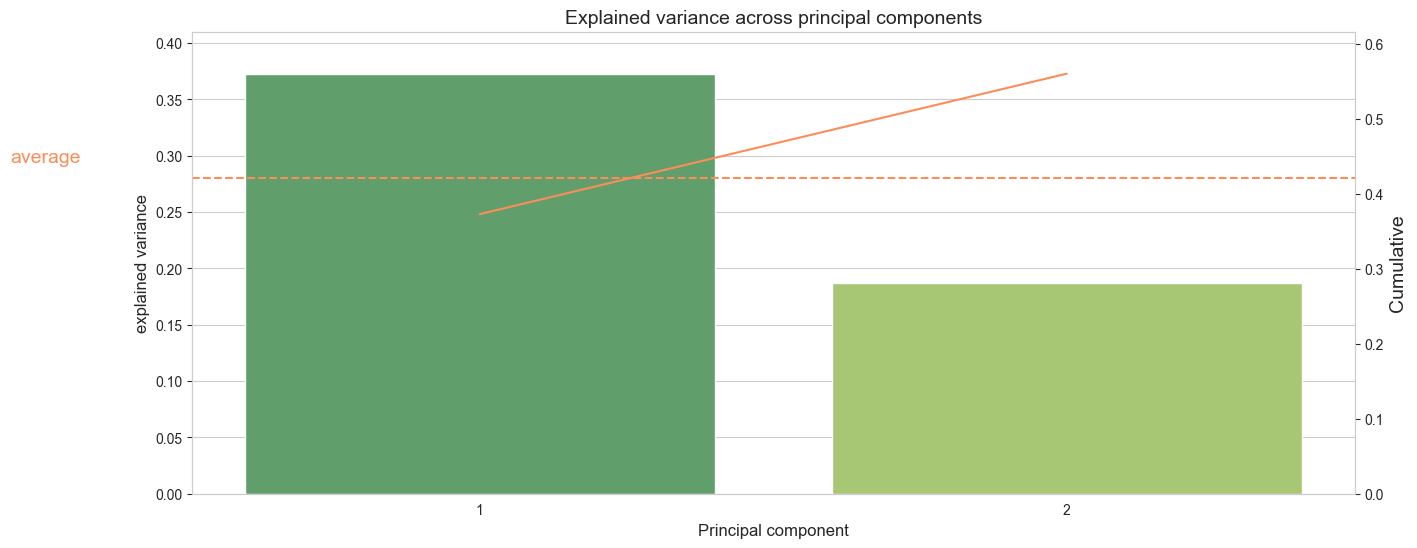

In [42]:
#limit plot to x PC
limit = int(input("Limit scree plot to nth component (0 for all) > "))
if limit > 0:
    limit_df = limit
else:
    limit_df = n_components
df_explained_variance_limited = df_explained_variance.iloc[:limit_df,:]
#make scree plot
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title('Explained variance across principal components', fontsize=14)
ax1.set_xlabel('Principal component', fontsize=12)
ax1.set_ylabel('Explained variance', fontsize=12)
ax2 = sns.barplot(x=idx[:limit_df], y='explained variance', data=df_explained_variance_limited, palette='summer')
ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel('Cumulative', fontsize=14)
ax2 = sns.lineplot(x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')
ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) #label y axis
max_y1 = max(df_explained_variance_limited.iloc[:,0])
max_y2 = max(df_explained_variance_limited.iloc[:,1])
ax1.set(ylim=(0, max_y1+max_y1*.1))
ax2.set(ylim=(0, max_y2+max_y2*.1))
plt.show()

In [43]:
print(pca.explained_variance_ratio_)
print(pca.n_components_)
print(X.shape[1])
print(X_train.shape[1])

[0.37281068 0.18739996]
2
13
2


## Training the Logistic Regression model on the Training set

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy Score: {}%".format(round(acc,2)))

[[16  0  0]
 [ 1 20  0]
 [ 0  0  8]]
Accuracy Score: 97.78%


## Visualising the Training set results

/var/folders/t_/j1kf85f16f7cqq6lm4lhjr440000gn/T/ipykernel_24249/1039402952.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


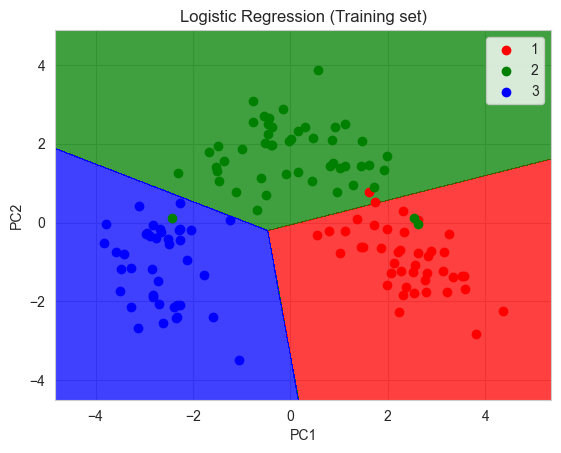

In [46]:
#This line imports the ListedColormap class from the matplotlib.colors module, which is used to create custom colormaps for plotting.
from matplotlib.colors import ListedColormap
#This line assigns the training data (features) to X_set and the corresponding labels to y_set. It assumes that X_train and y_train are pre-defined variables containing the feature and label data, respectively.
X_set, y_set = X_train, y_train
#This code creates a grid of points in the feature space using np.meshgrid. It specifies the range for X1 and X2 based on the minimum and maximum values of the features in X_set. The step=0.01 parameter determines the granularity of the grid
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#Here, the code makes predictions using the classifier for each point on the mesh grid. It flattens the grid into two arrays
# of coordinates using ravel(), predicts the class labels for each point, and then reshapes the predictions to match the 
#shape of the mesh grid. The result is a filled contour plot (contourf) that represents the decision boundaries of the 
#classifier. The alpha parameter controls the transparency of the plot, and the cmap parameter specifies the color map to use for different classes (red, green, and blue).
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
#These lines set the x and y-axis limits of the plot based on the minimum and maximum values of X1 and X2. This ensures that the entire mesh grid is visible in the plot.
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#This loop iterates over unique class labels in y_set. For each class, it plots the corresponding data points from X_set. 
#The c parameter specifies the color of the points based on the class, and label is used for the legend.
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

/var/folders/t_/j1kf85f16f7cqq6lm4lhjr440000gn/T/ipykernel_24249/1174788776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


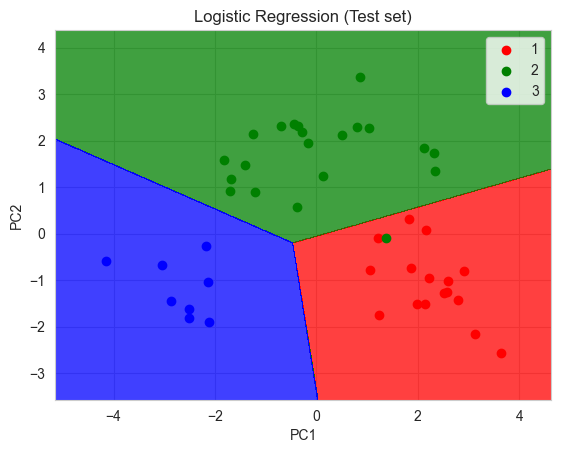

In [47]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()